<a href="https://colab.research.google.com/github/mvarsha117/ML_projects/blob/main/M200701CA_ProgAssgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from google.colab import files
from collections import Counter
from typing import List
import seaborn as sns
from scipy.stats import norm
import statistics
import math
!pip install mglearn

     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=e60c47e02d3394c3df581caff4575b283ae039521953ebba233d9e1c3f3684ee
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
uploaded=files.upload();

Saving iris.csv to iris.csv


In [ ]:
for fn in uploaded.keys():
  print(fn)
  print(len(uploaded[fn]))
  print(uploaded)

iris.csv
2477850
{'iris.csv': b'sepal_length,sepal_width,petal_length,petal_width,species,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
data=pd.read_csv("iris.csv")
print(data)

     sepal_length  sepal_width  ...  Unnamed: 16382  Unnamed: 16383
0             5.1          3.5  ...             NaN            10.2
1             4.9          3.0  ...             NaN             NaN
2             4.7          3.2  ...             NaN             NaN
3             4.6          3.1  ...             NaN             NaN
4             5.0          3.6  ...             NaN             NaN
..            ...          ...  ...             ...             ...
145           6.7          3.0  ...             NaN             NaN
146           6.3          2.5  ...             NaN             NaN
147           6.5          3.0  ...             NaN             NaN
148           6.2          3.4  ...             NaN             NaN
149           5.9          3.0  ...             NaN             NaN

[150 rows x 16384 columns]


In [ ]:
df=data.dropna(axis=1)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


splitting the data


In [ ]:
dt=['sepal_length','sepal_width','petal_length','petal_width']
print(dt)
X=df[dt]
y=df.species
print(X.values)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  

**DECISION TREE QUESTION-** splitting dataset into training and test data,to check later whether or not our classifier works correctly.In this case test size is 30% and target size is 70%.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.978


In [ ]:
tree=DecisionTreeClassifier()
tree=tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor']


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9555555555555556


plotting the decision tree. The data is being divided into 3 different classes- Iris-setosa, Iris-versicolor, Iris-virginica.

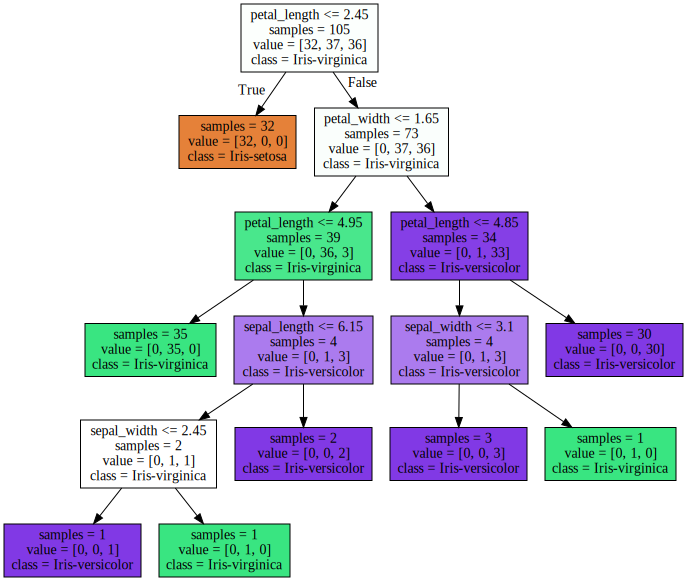

In [ ]:
import graphviz
export_graphviz(tree,out_file="tree.dot",class_names=['Iris-setosa','Iris-virginica','Iris-versicolor'],filled=True,impurity=False,feature_names=dt)
with open("tree.dot")as f:
  dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.00715649 0.03578244 0.54179133 0.41526974]


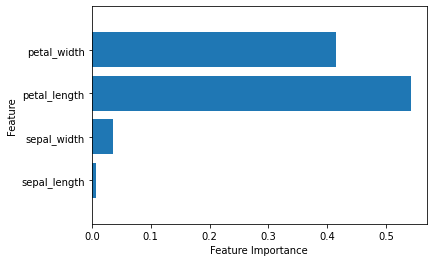

In [ ]:
def plot_feature_importances_iris(model):
  n_features=X.shape[1]
  plt.barh(range(n_features),model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features),dt)
  plt.xlabel("Feature Importance")
  plt.ylabel("Feature")
  plt.ylim(-1,n_features)

plot_feature_importances_iris(tree)

**KNN QUESTION-**
Making the training data 75% and testing data-25%.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:0.982
Accuracy on test set:1.000


Set the number of neighbours to 3.Fix the classifier using training set,i.e,storing the dataset, so that we can compute neighbours during prediction.
Call predict method to make predictions.For each data point in the test set this computes it's nearest neighbours in the training set and finds most common class among these. 

In [ ]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']


measuring accuracy of our model

In [ ]:
y_pred=clf.predict(X_test)
print("y_pred",y_pred)
print("y_test",y_test)
print("Model accuracy:{:.2f}".format(metrics.accuracy_score(y_test,y_pred)))

y_pred ['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']
y_test 94     Iris-versicolor
119     Iris-virginica
125     Iris-virginica
14         Iris-setosa
61     Iris-versicolor
7          Iris-setosa
66     Iris-versicolor
73     Iris-versicolor
138     Iris-virginica
98     Iris-versicolor
130     Iris-virginica
107     Iris-virginica
108     Iris-virginica
27         Iris-setosa
85     Iris-versicolor
114     Ir

Building confusion matrix

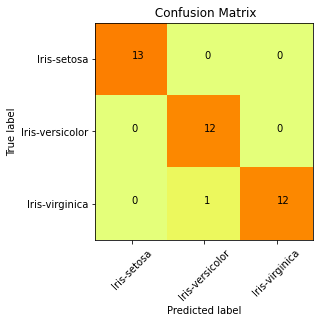

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Iris-setosa'  ,'Iris-versicolor','Iris-virginica']
plt.title(' Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(3):
    for j in range(3):
        plt.text(j,i, str(cm[i][j]))
plt.show()


Calculating model accurancy when neigbors is set to 5

In [ ]:
knn_5=KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Model accuracy:{:.2f}".format(metrics.accuracy_score(y_test,y_pred)))

Model accuracy:0.97


Plot the graph to show the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis

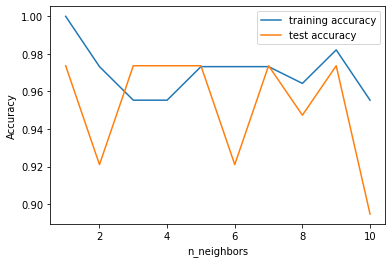

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
  clf=KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train,y_train)
  training_accuracy.append(clf.score(X_train,y_train))
  test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

**KMEANS CLUSTERING QUESTION-**
define clusters as 3 and fit the model


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
y_means=kmeans.fit_predict(X)
print(y_means)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]



finding optimum number of clusters for kmeans.

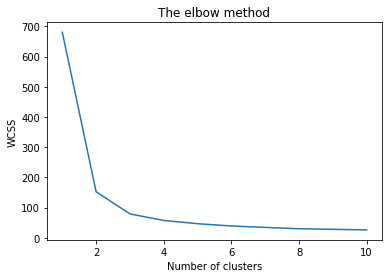

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

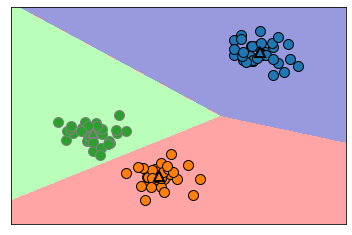

In [ ]:
import mglearn
mglearn.plots.plot_kmeans_boundaries()